In [1]:
from sofind import DataModel
from pixell import enplot, enmap
from orphics import maps

--------------------------------------------------------------------------
detected:

  Local host:            cpu-r-5
  Device name:           mlx5_0
  Device vendor ID:      0x02c9
  Device vendor part ID: 4129

Default device parameters will be used, which may result in lower
performance.  You can edit any of the files specified by the
btl_openib_device_param_files MCA parameter to set values for your
device.

NOTE: You can turn off this warning by setting the MCA parameter
      btl_openib_warn_no_device_params_found to 0.
--------------------------------------------------------------------------
--------------------------------------------------------------------------
but there are no active ports detected (or Open MPI was unable to use
them).  This is most certainly not what you wanted.  Check your
cables, subnet manager configuration, etc.  The openib BTL will be
ignored for this job.

  Local host: cpu-r-5
-----------------------------------------------------------------------

In [2]:
config_name = 'act_dr6v4'
mask_subproduct = 'lensing_masks'
mask_type = 'dr6v4_20240919'

In [3]:
dfact=2
apod=3

In [6]:
daynights = ['daydeep', 'daywide', 'night']
fskys = [60,70,80]

daydeep 60


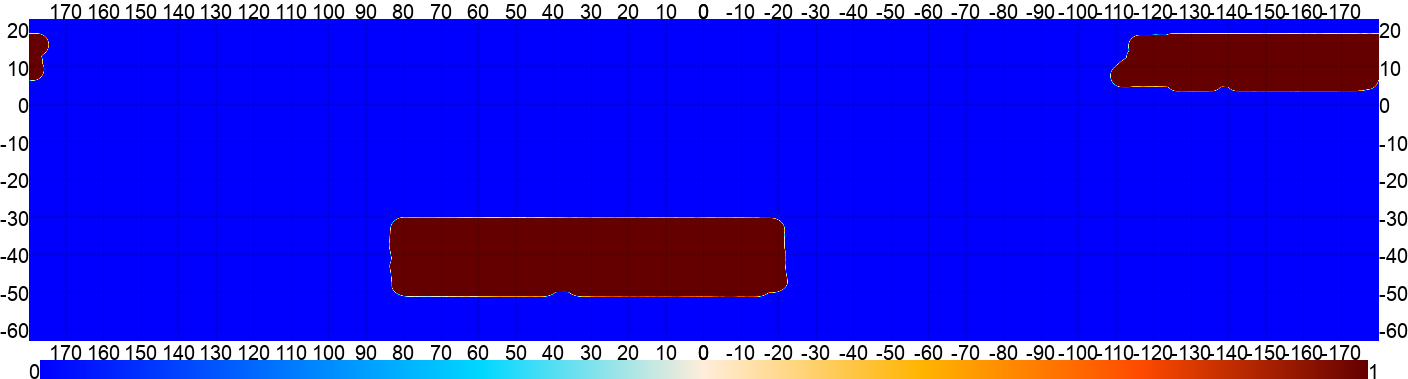

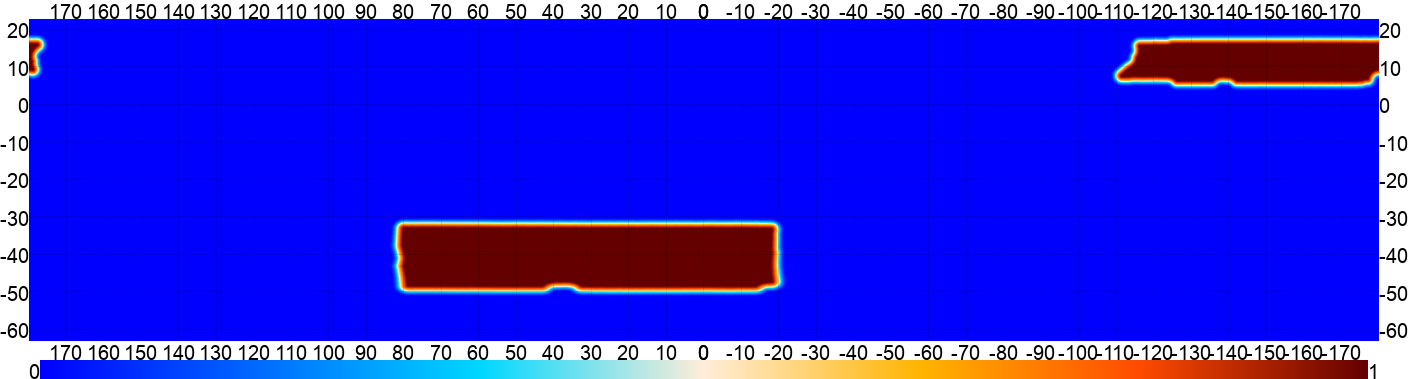

daydeep 70


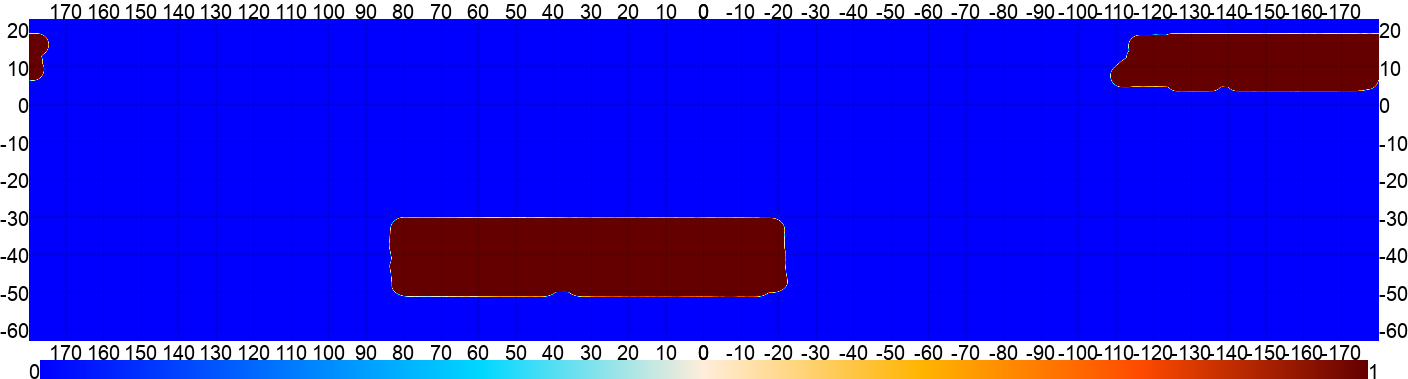

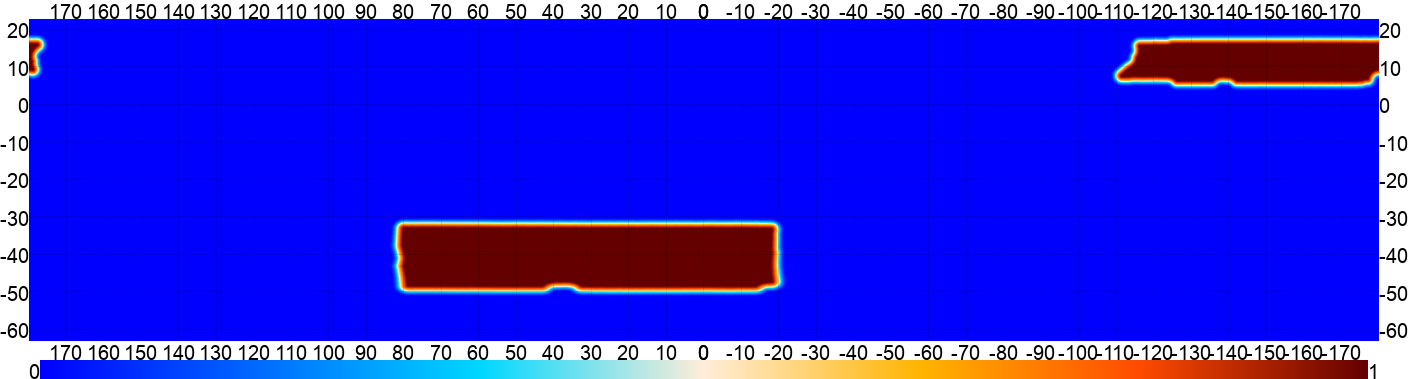

daydeep 80


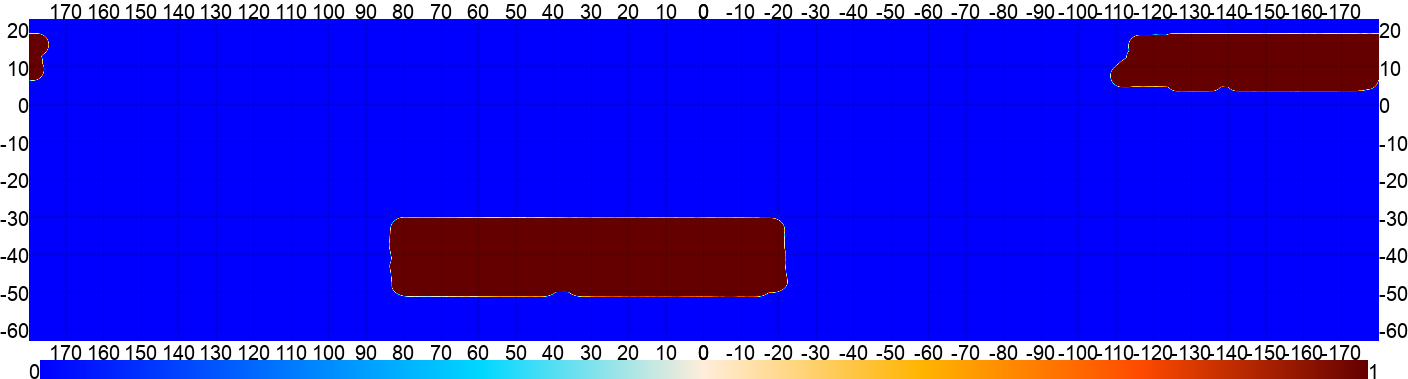

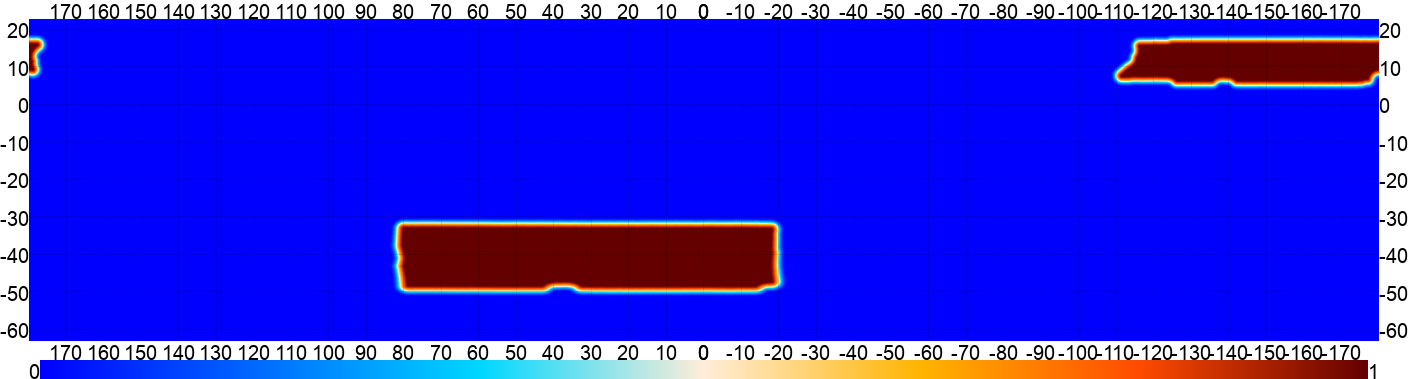

daywide 60


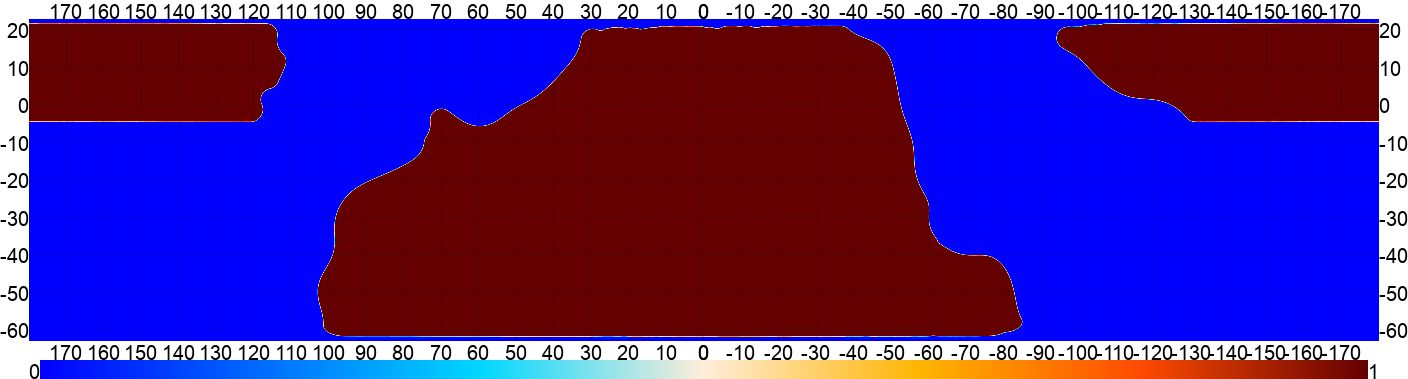

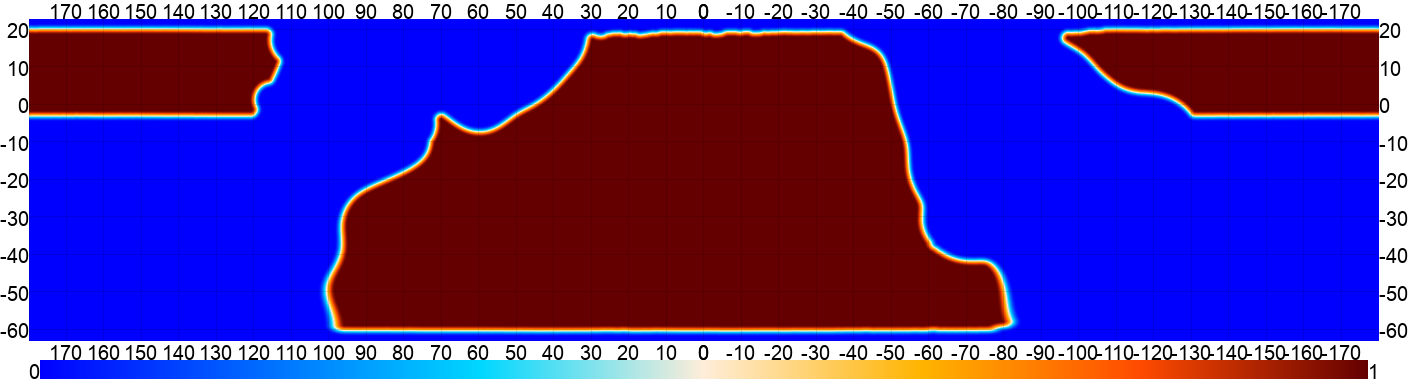

daywide 70


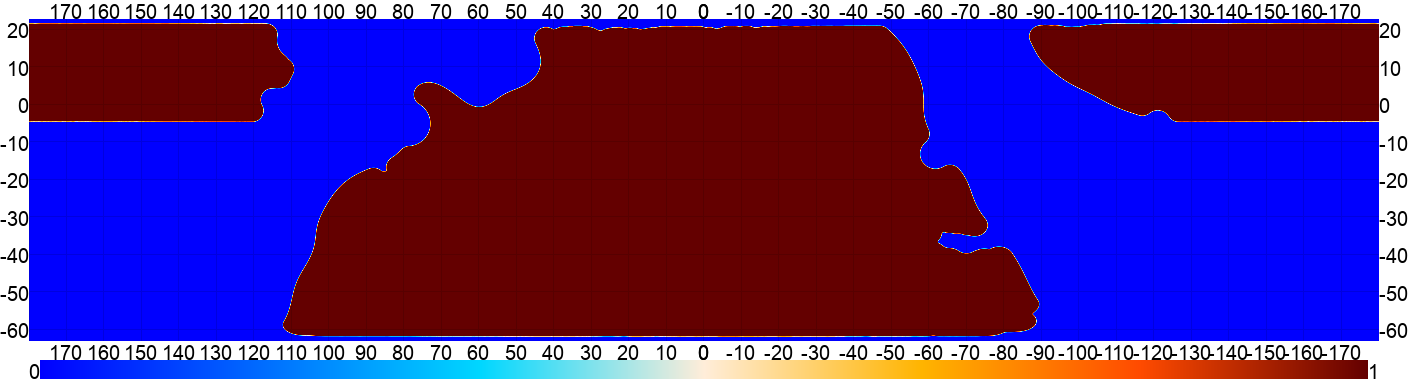

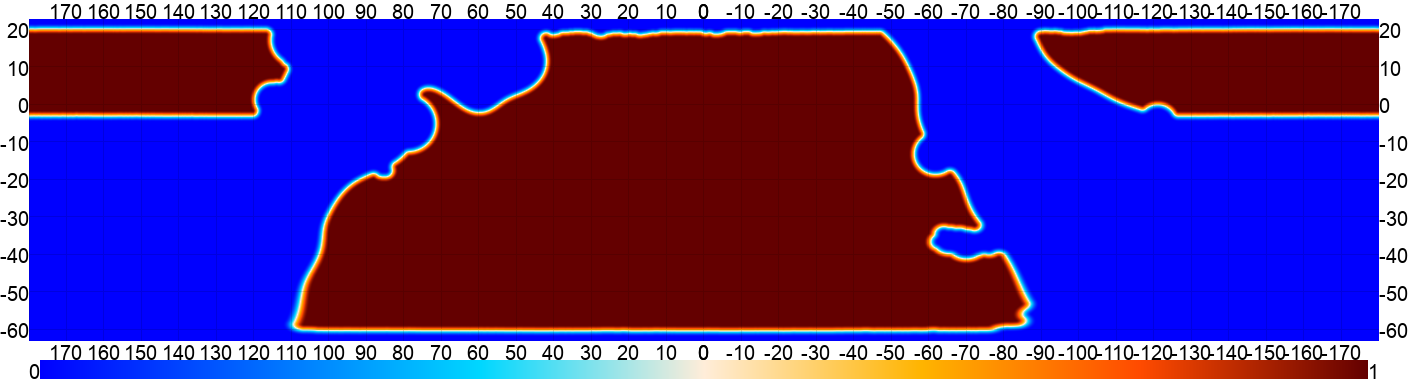

daywide 80


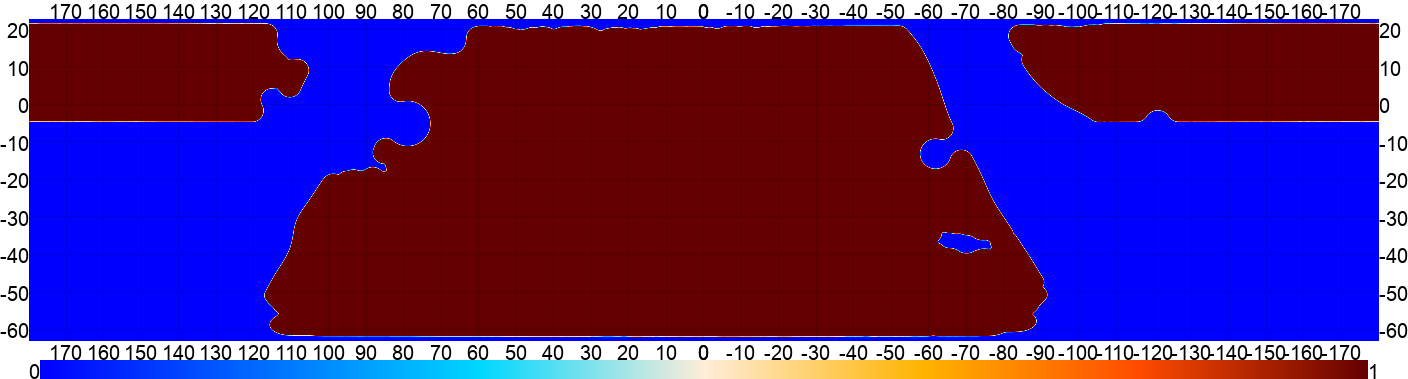

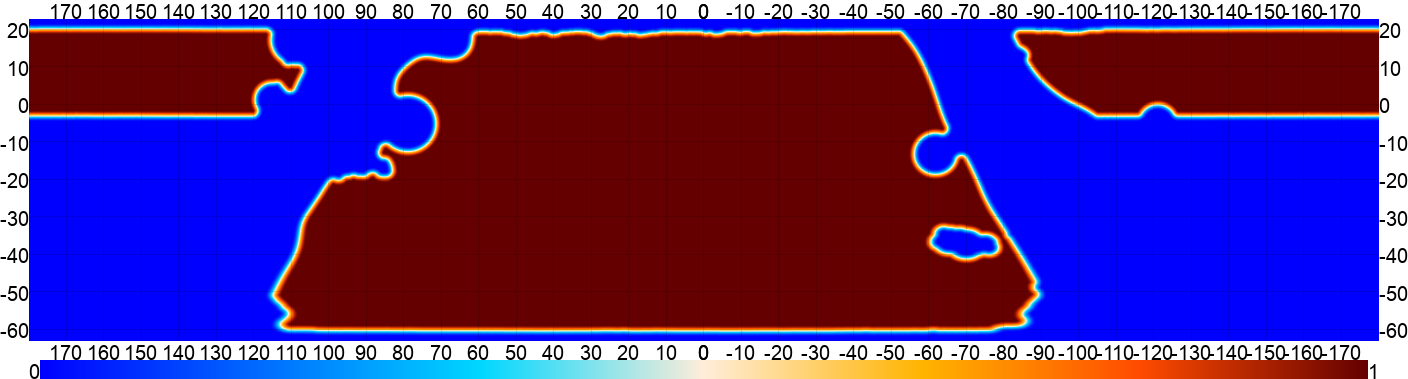

night 60


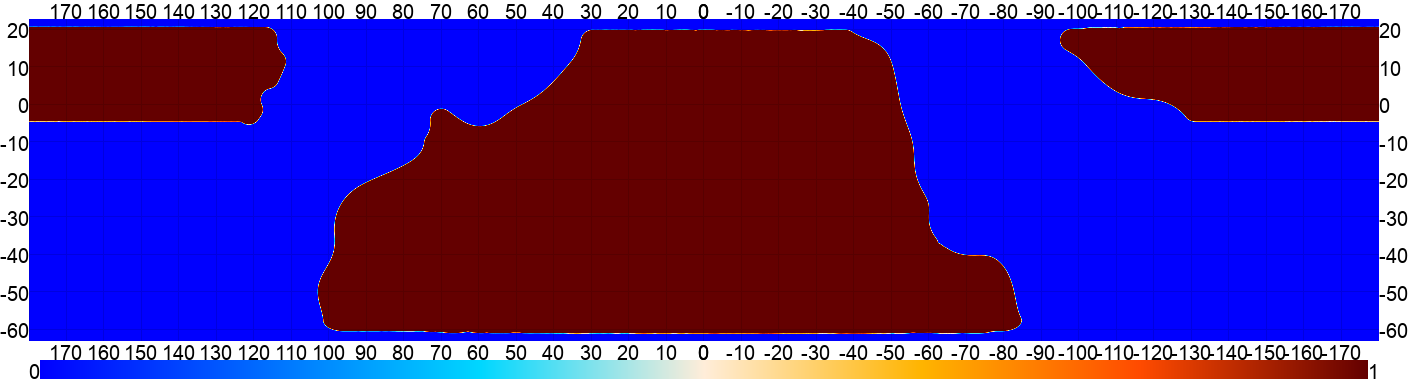

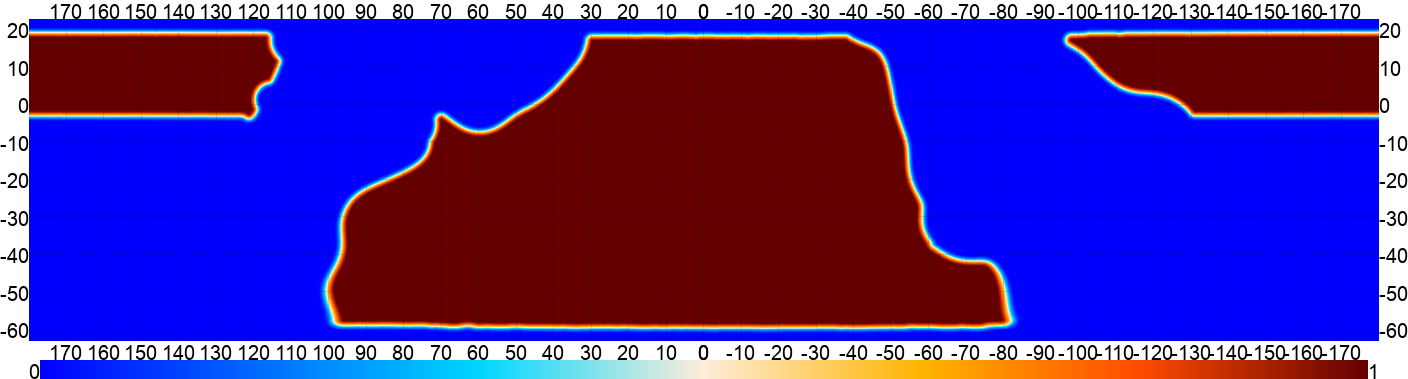

night 70


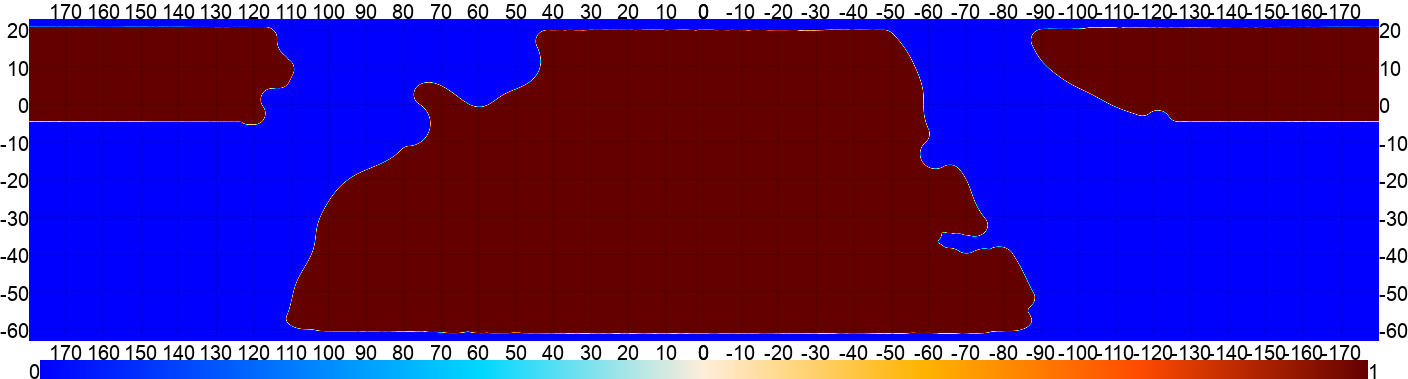

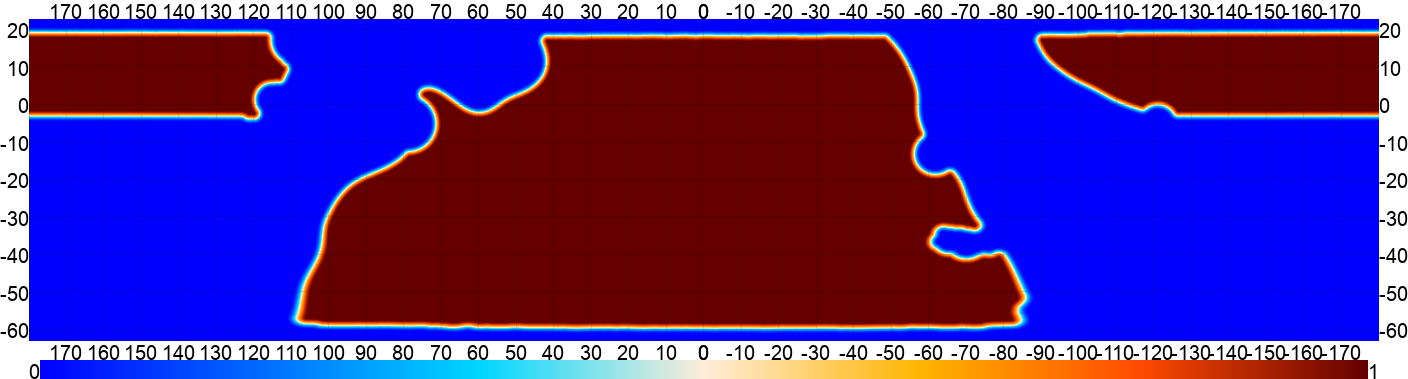

night 80


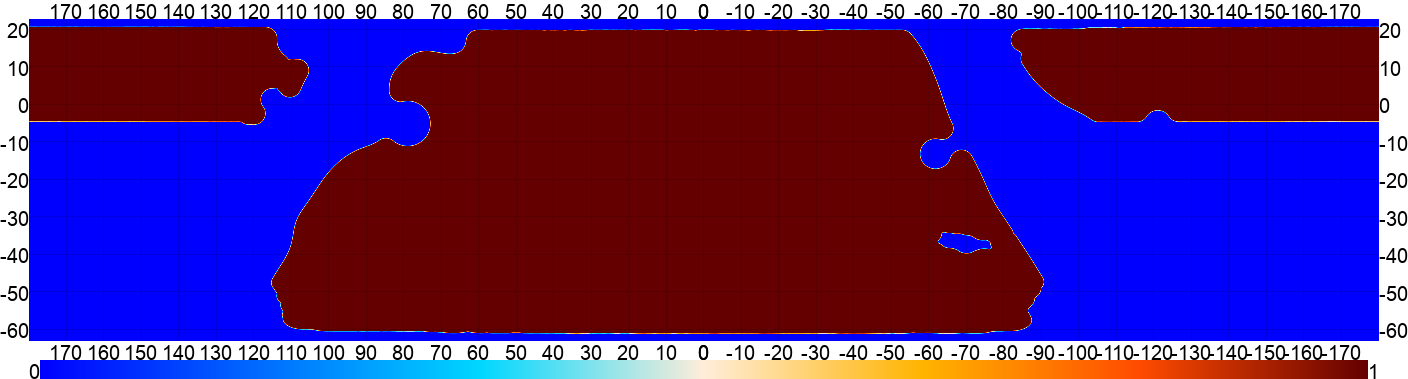

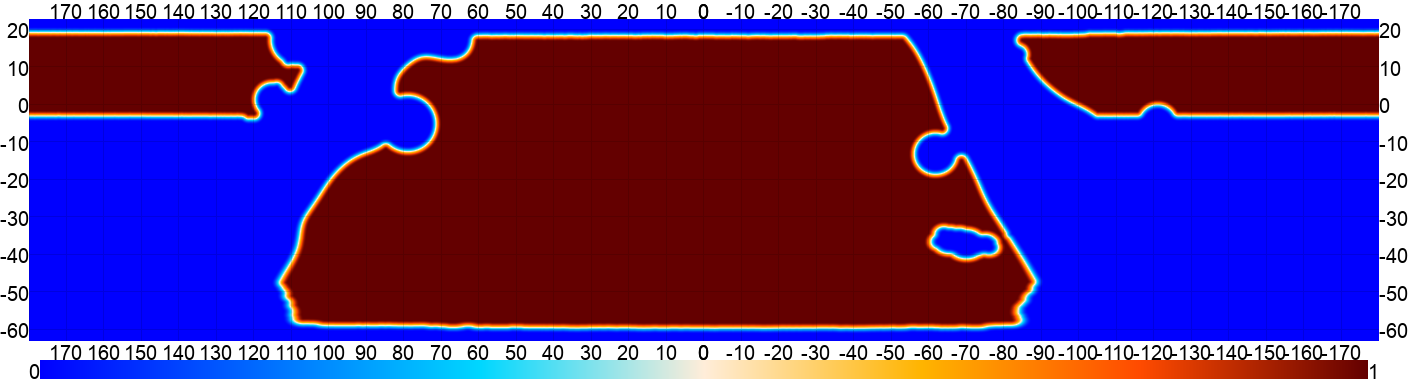

In [8]:
dm = DataModel.from_config(config_name)
mask_options = {}

for daynight in daynights:
    for fsky in fskys:
        print(f'{daynight} {fsky}')
        mask_options['skyfrac'] = fsky
        mask_options['daynight'] = daynight
        
        mask = dm.read_mask(subproduct=mask_subproduct, mask_type=mask_type,**mask_options)
        enplot.pshow(mask, downgrade=32, colorbar=True, ticks=10)
        
        mask_d2 = enmap.downgrade(mask,dfact)
        mask_d2_apo = maps.cosine_apodize(mask_d2, apod)
        
        enplot.pshow(mask_d2_apo, downgrade=16, colorbar=True, ticks=10)
        
        enmap.write_map(dm.get_mask_fn(subproduct=mask_subproduct, mask_type=mask_type,**mask_options).split('.fits')[0] + f'_d{dfact}_apo{apod}deg.fits', mask_d2_apo)
